In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [46]:
from xgboost import XGBClassifier
from xgboost import XGBRFRegressor

In [3]:
calories = pd.read_csv('Data/calories.csv')
exercise_data = pd.read_csv('Data/exercise.csv')

In [4]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [5]:
exercise_data

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3


In [6]:
exercise_data=pd.concat([exercise_data,calories['Calories']],axis=1)

In [7]:
exercise_data

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


In [8]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [9]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [10]:
exercise_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [11]:
exercise_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [18]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [30]:
exercise_data=exercise_data.replace({"Gender" : {"male" : 0 ,"female" : 1 }})

C:\Users\kadarba_12\AppData\Local\Temp\ipykernel_13492\2469627736.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  exercise_data=exercise_data.replace({"Gender" : {"male" : 0 ,"female" : 1 }})


In [31]:
exercise_data.head()


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [32]:
exercise_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [34]:
exercise_data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
14995    False
14996    False
14997    False
14998    False
14999    False
Length: 15000, dtype: bool

In [35]:
sns.set

<function seaborn.rcmod.set(*args, **kwargs)>

<Axes: xlabel='Age', ylabel='Calories'>

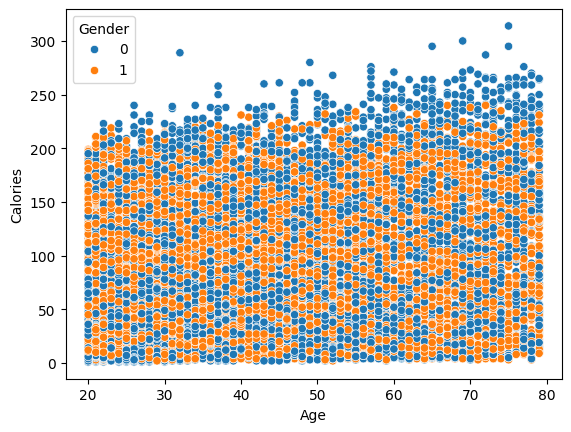

In [38]:
sns.scatterplot(x='Age', y='Calories', data=exercise_data, hue='Gender')

<Axes: xlabel='Calories'>

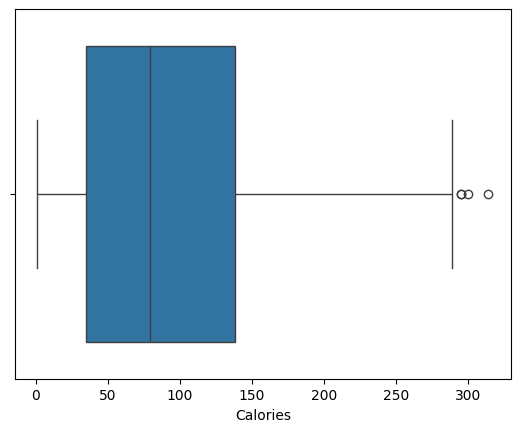

In [40]:
sns.boxplot(x=exercise_data['Calories'])

<Axes: xlabel='Age'>

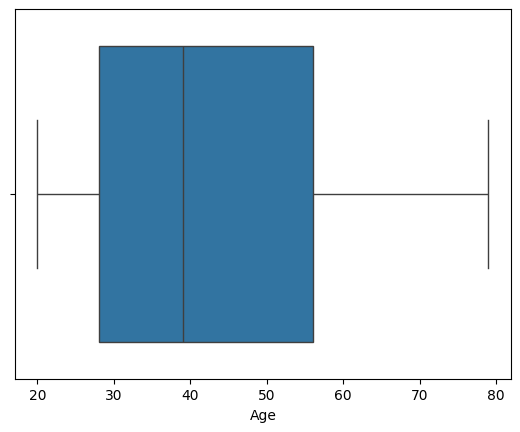

In [41]:
sns.boxplot(x=exercise_data['Age'])


<Axes: xlabel='Weight'>

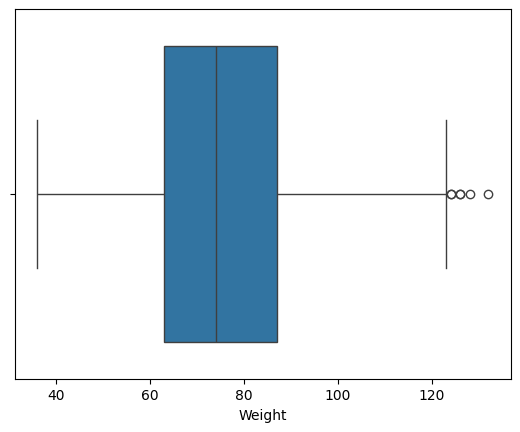

In [43]:
sns.boxplot(x=exercise_data['Weight'])


In [44]:
x=exercise_data.drop(columns=['Calories'], axis=1)
y=exercise_data['Calories']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


<Axes: xlabel='Calories'>

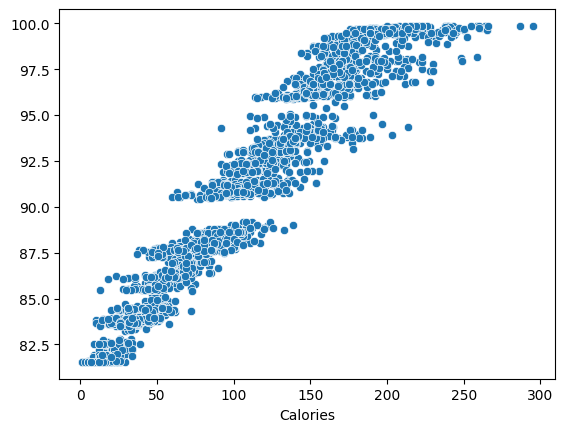

In [48]:
xgb=XGBRFRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)
sns.scatterplot(x=y_test, y=y_pred)

In [51]:
mse=mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')
print(f'Mean Absolute Error: {mae}')
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

Mean Squared Error: 3341.017417288302
R2 Score: 0.17215311146454626
Mean Absolute Error: 48.86328216044108


In [50]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [52]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [54]:
from sklearn.compose import ColumnTransformer

In [55]:
from sklearn.pipeline import Pipeline

In [56]:
numeric_features = ['Age', 'Weight', 'Height', 'Duration', 'Heart_Rate', 'Body_Temp']

In [72]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
           ('scaler', StandardScaler())
        ]), numeric_features)
      
    ])

# Full pipeline with preprocessing + model
full_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', XGBRFRegressor())
])

In [107]:
test_ids = x_test['User_ID']

Mean Squared Error: 63.67343119489528
R2 Score: 0.984222814396504
Mean Absolute Error: 5.347671451171239
✅ Submission file saved as 'submission.csv'


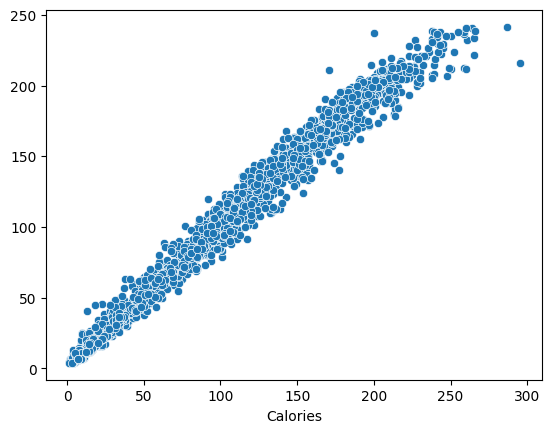

In [108]:
# Train the model
full_pipeline.fit(x_train, y_train)

# Make predictions on test set
y_pred = full_pipeline.predict(x_test)

# Evaluate the model
sns.scatterplot(x=y_test, y=y_pred)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')
print(f'Mean Absolute Error: {mae}')

# Generate submission file
submission_df = pd.DataFrame({
'User_ID': test_ids,   # use your test IDs
    'Prediction': y_pred
})

# Save the submission file
submission_df.to_csv('submission.csv', index=False)
print("✅ Submission file saved as 'submission.csv'")

In [74]:
import joblib
# Save the model to a file
joblib.dump(full_pipeline, 'calorie_prediction_model.pkl')


['calorie_prediction_model.pkl']